In [95]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [97]:
from radial.batchflow import Dataset, FilesIndex, Pipeline, action, inbatch_parallel, B, V, C
import radial.batchflow as ds
from radial.batchflow.models.tf import TFModel, VGG7
from radial import RadialBatch

In [98]:
path = '../data/reconsidered/test_npz/*.npz'
index = FilesIndex(path=path, no_ext=True)

test_set = Dataset(index, batch_class=RadialBatch)

In [99]:
load_ppl = (Pipeline()
            .load(fmt='npz', components=['time', 'derivative', 'rig_type', 'target', 'predictions']))

index  rr_87


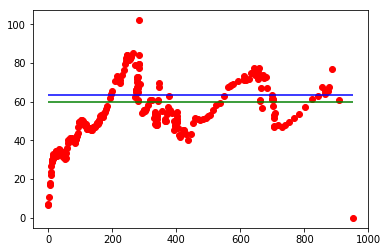

index  rr_55


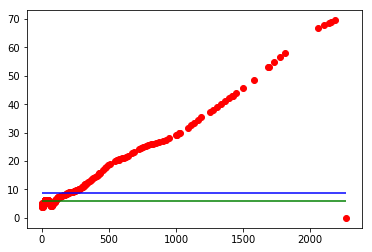

In [100]:
draw_ppl = load_ppl << test_set

btch = draw_ppl.next_batch(2)
for i in range(2):
    print('index ', btch.indices[i])
    plt.scatter(btch.time[i], btch.derivative[i], c='r')
    plt.hlines(btch.target[i], np.min(btch.time[i]), np.max(btch.time[i]), colors='g')
    plt.hlines(btch.predictions[i], np.min(btch.time[i]), np.max(btch.time[i]), colors='b')
    plt.show()

In [111]:
btch = (load_ppl << test_set).next_batch(len(test_set.indices))

In [112]:
metrics = np.abs(btch.predictions.reshape(-1) - btch.target.reshape(-1)) / btch.target.reshape(-1)

In [113]:
np.mean(metrics)

0.6192607456336803

In [114]:
x = np.ravel(metrics)

In [115]:
z = x.astype(np.float32)

In [116]:
np.percentile(z, q=50)

0.4019083231687546

In [117]:
np.percentile(z, q=90)

1.0038757503032691

(array([58., 24.,  2.,  3.,  0.,  1.,  1.,  0.,  0.,  1.]),
 array([0.        , 0.59156117, 1.18312235, 1.77468352, 2.3662447 ,
        2.95780587, 3.54936705, 4.14092822, 4.7324894 , 5.32405057,
        5.91561174]),
 <a list of 10 Patch objects>)

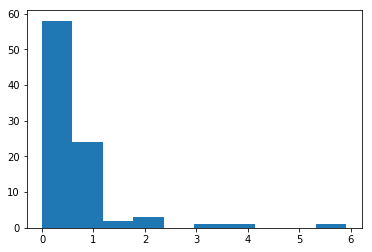

In [118]:
plt.hist(z)

(array([14.,  9., 12.,  9.,  7.,  4., 10.,  2.,  7.,  6.]),
 array([0.        , 0.0958962 , 0.19179239, 0.28768859, 0.38358479,
        0.47948098, 0.57537718, 0.67127337, 0.76716957, 0.86306577,
        0.95896196]),
 <a list of 10 Patch objects>)

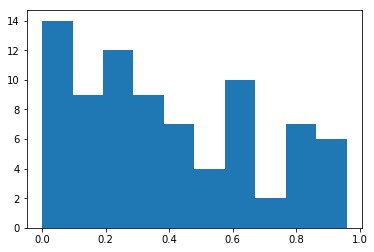

In [119]:
plt.hist(np.sort(z)[:-10])